#Respuesta 1

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spark_colab_installer.py to spark_colab_installer.py
User uploaded file "spark_colab_installer.py" with length 4307 bytes


In [ ]:
exec(open('spark_colab_installer.py').read())

Active services:
1011 ResourceManager
1380 DataNode
1673 Jps
1100 NameNode
1500 NodeManager
1564 JobHistoryServer

Apache Spark installed


#Respuesta 2

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bank-additional-full.csv to bank-additional-full.csv
User uploaded file "bank-additional-full.csv" with length 5834924 bytes


#Respuesta 3

In [ ]:
import findspark
findspark.init()

import os
import matplotlib.pyplot as plt
from pyspark.sql.functions import count, col

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("miniproyecto2").getOrCreate()

text = open("bank-additional-full.csv", "r")
text = ''.join([i for i in text]) \
    .replace(";", ",") \
    .replace('"','')
x = open("bank-additional-full.csv","w")
x.writelines(text)
x.close()

bank = spark.read.options(header=True).csv('file:///content/bank-additional-full.csv')

bank.show(5)
print(bank.count())

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|       5191| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|       5191| no|
| 37| serv

#Respuesta 4

In [ ]:
simpleDF_yes = bank.select(["age","job","education","housing"]).where(col("y").like("yes"))
simpleDF_no = bank.select(["age","job","education","housing"]).where(col("y").like("no"))

simpleDF_yes.show(10)
simpleDF_no.show(10)


+---+------------+-------------------+-------+
|age|         job|          education|housing|
+---+------------+-------------------+-------+
| 41| blue-collar|           basic.4y|    yes|
| 49|entrepreneur|  university.degree|    yes|
| 49|  technician|           basic.9y|     no|
| 41|  technician|professional.course|    yes|
| 45| blue-collar|           basic.9y|    yes|
| 42| blue-collar|           basic.9y|    yes|
| 39|   housemaid|           basic.9y|    yes|
| 28|     unknown|            unknown|    yes|
| 44|    services|        high.school|    yes|
| 42|  technician|professional.course|     no|
+---+------------+-------------------+-------+
only showing top 10 rows

+---+-----------+-------------------+-------+
|age|        job|          education|housing|
+---+-----------+-------------------+-------+
| 56|  housemaid|           basic.4y|     no|
| 57|   services|        high.school|     no|
| 37|   services|        high.school|    yes|
| 40|     admin.|           basic.6y|   

#Respuesta 5

##Histograma por "age" para el dataframe "simpleDF_yes" 

4640
+---+-----+
|age|count|
+---+-----+
| 51|   72|
| 54|   64|
| 29|  186|
| 69|   14|
| 42|   91|
| 73|   13|
| 87|    1|
| 64|   27|
| 30|  202|
| 34|  184|
+---+-----+
only showing top 10 rows

[0, 34, 888, 1715, 834, 697, 251, 144, 72, 5]


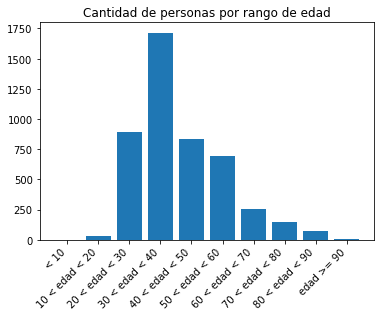

In [ ]:
print(simpleDF_yes.count())
ages_count = simpleDF_yes.groupBy('age').agg(count('age').alias('count'))
ages_count.show(10)

data = ages_count.collect()
counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for age in data:
    if int(age[0]) < 10:
        counts[0] += age[1]
    elif int(age[0]) < 20:
        counts[1] += age[1]
    elif int(age[0]) < 30:
        counts[2] += age[1]
    elif int(age[0]) < 40:
        counts[3] += age[1]
    elif int(age[0]) < 50:
        counts[4] += age[1]
    elif int(age[0]) < 60:
        counts[5] += age[1]
    elif int(age[0]) < 70:
        counts[6] += age[1]
    elif int(age[0]) < 80:
        counts[7] += age[1]
    elif int(age[0]) < 90:
        counts[8] += age[1]
    else:
        counts[9] += age[1]

print(counts)
plt.bar(range(len(counts)), counts, tick_label=['< 10', '10 < edad < 20', '20 < edad < 30', '30 < edad < 40', '40 < edad < 50', '50 < edad < 60', '60 < edad < 70', '70 < edad < 80', '80 < edad < 90','edad >= 90'])
plt.title('Cantidad de personas por rango de edad')
plt.xticks(rotation=45, ha='right')
plt.show()





##Histograma por "age" para el dataframe "simpleDF_no" 

+---+-----+
|age|count|
+---+-----+
| 51|  682|
| 54|  620|
| 29| 1267|
| 69|   20|
| 42| 1051|
| 73|   21|
| 64|   30|
| 30| 1512|
| 34| 1561|
| 59|  394|
+---+-----+
only showing top 10 rows

[0, 41, 4706, 15223, 9692, 6165, 473, 175, 68, 5]


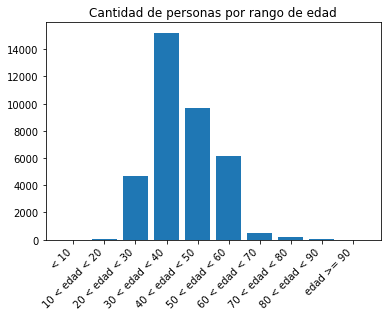

In [ ]:
ages_count = simpleDF_no.groupBy('age').agg(count('age').alias('count'))
ages_count.show(10)

data = ages_count.collect()
counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for age in data:
    if int(age[0]) < 10:
        counts[0] += age[1]
    elif int(age[0]) < 20:
        counts[1] += age[1]
    elif int(age[0]) < 30:
        counts[2] += age[1]
    elif int(age[0]) < 40:
        counts[3] += age[1]
    elif int(age[0]) < 50:
        counts[4] += age[1]
    elif int(age[0]) < 60:
        counts[5] += age[1]
    elif int(age[0]) < 70:
        counts[6] += age[1]
    elif int(age[0]) < 80:
        counts[7] += age[1]
    elif int(age[0]) < 90:
        counts[8] += age[1]
    else:
        counts[9] += age[1]

print(counts)
plt.bar(range(len(counts)), counts, tick_label=['< 10', '10 < edad < 20', '20 < edad < 30', '30 < edad < 40', '40 < edad < 50', '50 < edad < 60', '60 < edad < 70', '70 < edad < 80', '80 < edad < 90','edad >= 90'])
plt.title('Cantidad de personas por rango de edad')
plt.xticks(rotation=45, ha='right')
plt.show()

##Histograma por "job" para el dataframe "simpleDF_yes" 

4640
12
+-------------+-----+
|          job|count|
+-------------+-----+
|   management|  328|
|      retired|  434|
|      unknown|   37|
|self-employed|  149|
|      student|  275|
|  blue-collar|  638|
| entrepreneur|  124|
|       admin.| 1352|
|   technician|  730|
|     services|  323|
|    housemaid|  106|
|   unemployed|  144|
+-------------+-----+



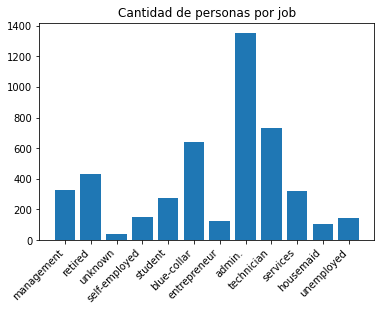

In [ ]:
print(simpleDF_yes.count())
jobs_count = simpleDF_yes.groupBy('job').agg(count('job').alias('count'))
print(jobs_count.count())
jobs_count.show()

data = jobs_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por job')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

##Histograma por "job" para el dataframe "simpleDF_no" 

36548
12
+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2596|
|      retired| 1286|
|      unknown|  293|
|self-employed| 1272|
|      student|  600|
|  blue-collar| 8616|
| entrepreneur| 1332|
|       admin.| 9070|
|   technician| 6013|
|     services| 3646|
|    housemaid|  954|
|   unemployed|  870|
+-------------+-----+



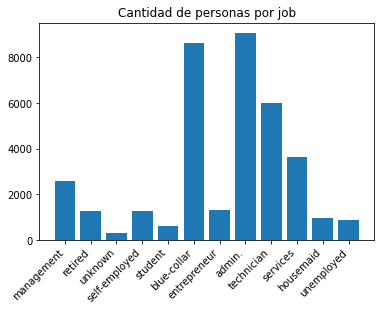

In [ ]:
print(simpleDF_no.count())
jobs_count = simpleDF_no.groupBy('job').agg(count('job').alias('count'))
print(jobs_count.count())
jobs_count.show()

data = jobs_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por job')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

##Histograma por "education" para el dataframe "simpleDF_yes" 

4640
8
+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 1031|
|            unknown|  251|
|           basic.6y|  188|
|professional.course|  595|
|  university.degree| 1670|
|         illiterate|    4|
|           basic.4y|  428|
|           basic.9y|  473|
+-------------------+-----+



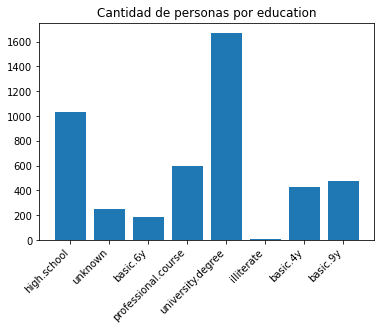

In [ ]:
print(simpleDF_yes.count())
educations_count = simpleDF_yes.groupBy('education').agg(count('education').alias('count'))
print(educations_count.count())
educations_count.show()

data = educations_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por education')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

##Histograma por "education" para el dataframe "simpleDF_no"

36548
8
+-------------------+-----+
|          education|count|
+-------------------+-----+
|        high.school| 8484|
|            unknown| 1480|
|           basic.6y| 2104|
|professional.course| 4648|
|  university.degree|10498|
|         illiterate|   14|
|           basic.4y| 3748|
|           basic.9y| 5572|
+-------------------+-----+



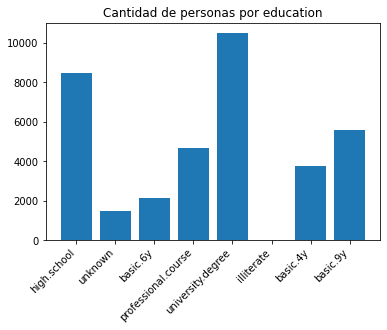

In [ ]:
print(simpleDF_no.count())
educations_count = simpleDF_no.groupBy('education').agg(count('education').alias('count'))
print(educations_count.count())
educations_count.show()

data = educations_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por education')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

##Histograma por "housing" para el dataframe "simpleDF_yes"

4640
3
+-------+-----+
|housing|count|
+-------+-----+
|unknown|  107|
|     no| 2026|
|    yes| 2507|
+-------+-----+



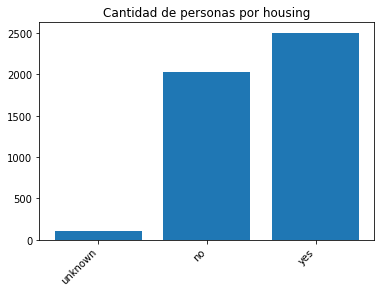

In [ ]:
print(simpleDF_yes.count())
housings_count = simpleDF_yes.groupBy('housing').agg(count('housing').alias('count'))
print(housings_count.count())
housings_count.show()

data = housings_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por housing')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

##Histograma por "housing" para el dataframe "simpleDF_no"

36548
3
+-------+-----+
|housing|count|
+-------+-----+
|unknown|  883|
|     no|16596|
|    yes|19069|
+-------+-----+



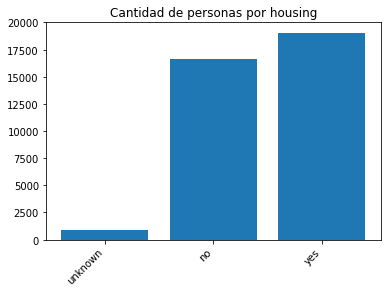

In [ ]:
print(simpleDF_no.count())
housings_count = simpleDF_no.groupBy('housing').agg(count('housing').alias('count'))
print(housings_count.count())
housings_count.show()

data = housings_count.collect()
labels = [d[0] for d in data]
values = [d[1] for d in data]

plt.title('Cantidad de personas por housing')
plt.xticks(rotation=45, ha='right')
plt.bar(range(len(data)), values, tick_label=labels)
plt.show()

#Respuesta 6

In [ ]:
simpleDF_yes.createOrReplaceTempView('countsDF')
countsDF = spark.sql("select job, education, count(*) as count from countsDF group by job, education order by count DESC")
countsDF.show(20)

+-------------+-------------------+-----+
|          job|          education|count|
+-------------+-------------------+-----+
|       admin.|  university.degree|  823|
|       admin.|        high.school|  382|
|   technician|professional.course|  343|
|   management|  university.degree|  257|
|  blue-collar|           basic.9y|  240|
|   technician|  university.degree|  225|
|     services|        high.school|  203|
|      retired|           basic.4y|  185|
|  blue-collar|           basic.4y|  123|
|      student|        high.school|  114|
|  blue-collar|           basic.6y|  107|
|self-employed|  university.degree|   96|
|  blue-collar|        high.school|   94|
|   technician|        high.school|   85|
| entrepreneur|  university.degree|   66|
|      retired|  university.degree|   66|
|      retired|        high.school|   62|
|      student|            unknown|   59|
|      retired|professional.course|   57|
|    housemaid|           basic.4y|   51|
+-------------+-------------------

#Respuesta 7

In [ ]:
countsDF.write.json('countsDF.json')
countsDF.write.saveAsTable('countsDF')

In [ ]:
simpleDF_yes.write.json('simpleDF_yes.json')
simpleDF_yes.write.saveAsTable('simpleDF_yes')

In [ ]:
simpleDF_no.write.json('simpleDF_no.json')
simpleDF_no.write.saveAsTable('simpleDF_no')

In [ ]:
!hdfs dfs -ls

Found 3 items
drwxr-xr-x   - root supergroup          0 2020-10-25 03:59 countsDF.json
drwxr-xr-x   - root supergroup          0 2020-10-25 04:04 simpleDF_no.json
drwxr-xr-x   - root supergroup          0 2020-10-25 04:03 simpleDF_yes.json


#Respuesta 8

In [ ]:
sc = spark.sparkContext

rdd = sc.textFile('file:///content/bank-additional-full.csv').filter(lambda line: not line.startswith('age,job')).map(lambda line: line.split(',')).filter(lambda line: line[20] == 'yes')

count = rdd.map(lambda row: ((row[1] ,row[3]), 1)).reduceByKey(lambda a,b: a+b).sortBy(lambda count: count[1], ascending=False)
print(count.take(20))

[(('admin.', 'university.degree'), 823), (('admin.', 'high.school'), 382), (('technician', 'professional.course'), 343), (('management', 'university.degree'), 257), (('blue-collar', 'basic.9y'), 240), (('technician', 'university.degree'), 225), (('services', 'high.school'), 203), (('retired', 'basic.4y'), 185), (('blue-collar', 'basic.4y'), 123), (('student', 'high.school'), 114), (('blue-collar', 'basic.6y'), 107), (('self-employed', 'university.degree'), 96), (('blue-collar', 'high.school'), 94), (('technician', 'high.school'), 85), (('entrepreneur', 'university.degree'), 66), (('retired', 'university.degree'), 66), (('retired', 'high.school'), 62), (('student', 'unknown'), 59), (('retired', 'professional.course'), 57), (('housemaid', 'basic.4y'), 51)]
